In [1]:
# Step 1 : Loading data

In [2]:
# Example: download April 2024 NYC data
!wget https://s3.amazonaws.com/tripdata/202404-citibike-tripdata.zip
!unzip 202404-citibike-tripdata.zip


--2025-09-02 11:05:14--  https://s3.amazonaws.com/tripdata/202404-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.104.240, 54.231.168.128, 52.217.121.0, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.104.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629567797 (600M) [application/zip]
Saving to: ‘202404-citibike-tripdata.zip’

202404-citibike-tri 100%[===================>] 600.40M  20.0MB/s    in 32s     

2025-09-02 11:05:47 (18.6 MB/s) - ‘202404-citibike-tripdata.zip’ saved [629567797/629567797]

Archive:  202404-citibike-tripdata.zip
 extracting: 202404-citibike-tripdata_4.csv  
 extracting: 202404-citibike-tripdata_1.csv  
 extracting: 202404-citibike-tripdata_2.csv  
 extracting: 202404-citibike-tripdata_3.csv  


In [3]:
import pandas as pd

# List the 4 split CSVs
files = [
    "/content/202404-citibike-tripdata_1.csv",
    "/content/202404-citibike-tripdata_2.csv",
    "/content/202404-citibike-tripdata_3.csv",
    "/content/202404-citibike-tripdata_4.csv"
]

# Show schema for each file
for f in files:
    print(f"\n===== Schema for {f} =====")
    sample = pd.read_csv(f, nrows=5)   # only load first 5 rows for speed
    print(sample.dtypes)               # data types
    print(sample.head())               # preview first 5 rows




===== Schema for /content/202404-citibike-tripdata_1.csv =====
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object
            ride_id  rideable_type               started_at  \
0  5ADFD3F27C884D2C   classic_bike  2024-04-13 14:21:51.604   
1  A4393C563327BAC9   classic_bike  2024-04-10 15:02:12.980   
2  16F80ACD62EC6D4D  electric_bike  2024-04-11 15:57:35.909   
3  0A04E37F00195A3F   classic_bike  2024-04-05 08:52:53.483   
4  233B813D26AB2921  electric_bike  2024-04-09 14:58:56.616   

                  ended_at           start_station_name  start_station_id  \
0  2024-04-13 14:32:20.304            Dean St & Hoyt St           4446.05   

In [4]:
# Read all CSVs into one DataFrame
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Convert started_at and ended_at to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"]   = pd.to_datetime(df["ended_at"])

# Create a new feature: trip duration in minutes
df["trip_duration_min"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

# Show info and sample rows
print("===== Combined Data Info =====")
print(df.info())
print("\n===== First 5 rows =====")
print(df.head())

# Quick stats on trip duration
print("\n===== Trip Duration Summary =====")
print(df["trip_duration_min"].describe())



/tmp/ipython-input-118510937.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in files]
/tmp/ipython-input-118510937.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in files]
/tmp/ipython-input-118510937.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in files]


===== Combined Data Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217063 entries, 0 to 3217062
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  trip_duration_min   float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 343.6+ MB
None

===== First 5 rows =====
            ride_id  rideable_type              started_at  \
0  5ADFD3F27C884D2C   classic_bike 2024-04-13 14:2

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


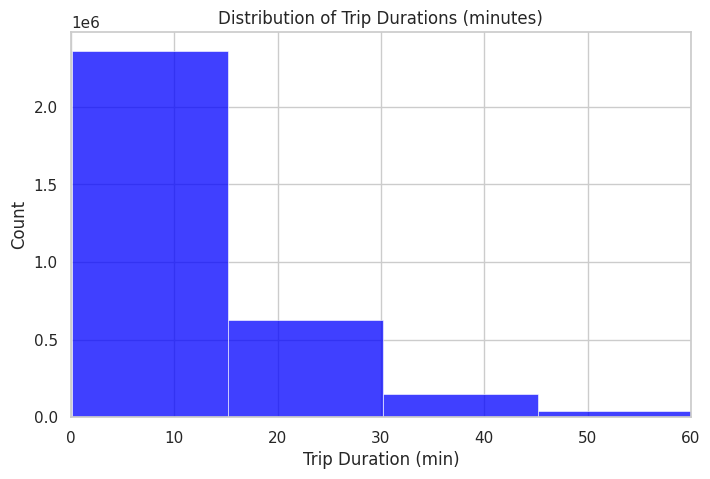

In [6]:
# 1. Trip Duration Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["trip_duration_min"], bins=100, color="blue", kde=False)
plt.xlim(0,60)  # focus on trips under 1 hour
plt.title("Distribution of Trip Durations (minutes)")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1474636887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="member_casual", data=df, palette="Set2")


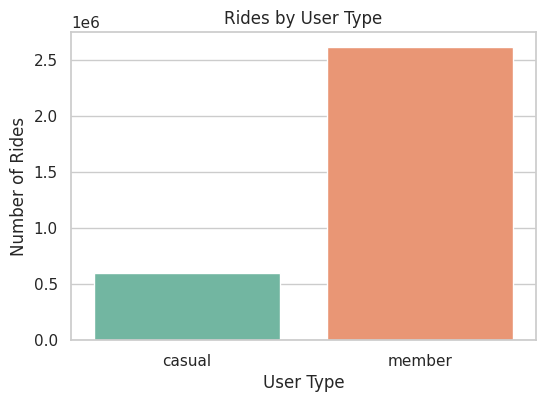

In [7]:
# 2. Member vs Casual usage
plt.figure(figsize=(6,4))
sns.countplot(x="member_casual", data=df, palette="Set2")
plt.title("Rides by User Type")
plt.xlabel("User Type")
plt.ylabel("Number of Rides")
plt.show()

/tmp/ipython-input-875236076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rideable_type", data=df, palette="Set3")


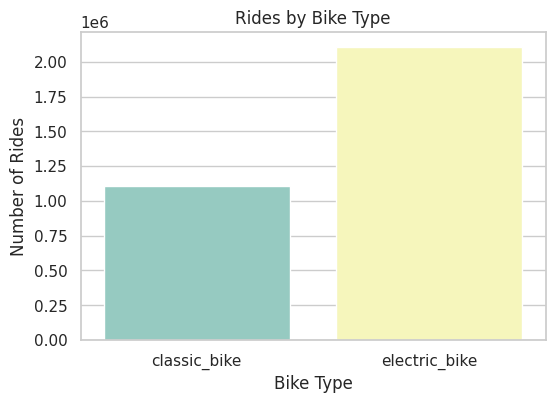

In [8]:
# 3. Rideable Type (classic/electric/docked)
plt.figure(figsize=(6,4))
sns.countplot(x="rideable_type", data=df, palette="Set3")
plt.title("Rides by Bike Type")
plt.xlabel("Bike Type")
plt.ylabel("Number of Rides")
plt.show()

In [9]:
# Extract useful time features
df["hour"] = df["started_at"].dt.hour
df["day_of_week"] = df["started_at"].dt.day_name()

/tmp/ipython-input-3570265263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour", data=df, palette="coolwarm")


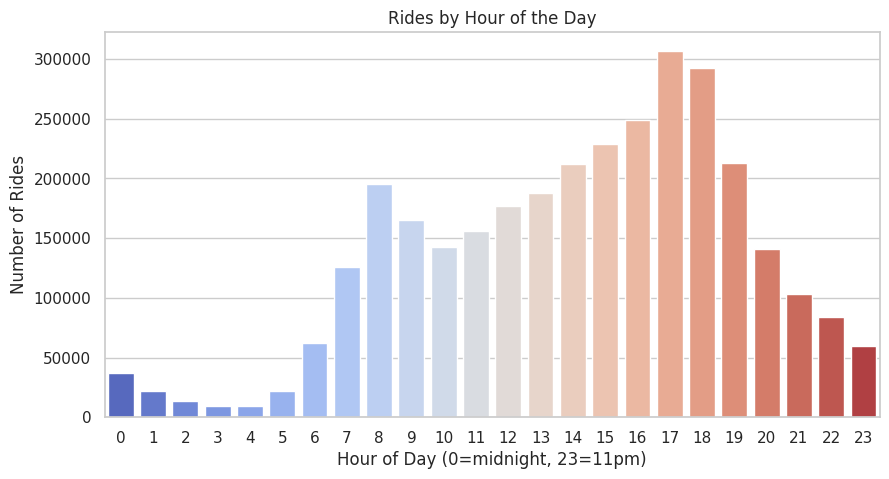

In [10]:
# 1. Busiest Hours of the Day
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=df, palette="coolwarm")
plt.title("Rides by Hour of the Day")
plt.xlabel("Hour of Day (0=midnight, 23=11pm)")
plt.ylabel("Number of Rides")
plt.show()

/tmp/ipython-input-327046900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day_of_week", data=df, order=order, palette="viridis")


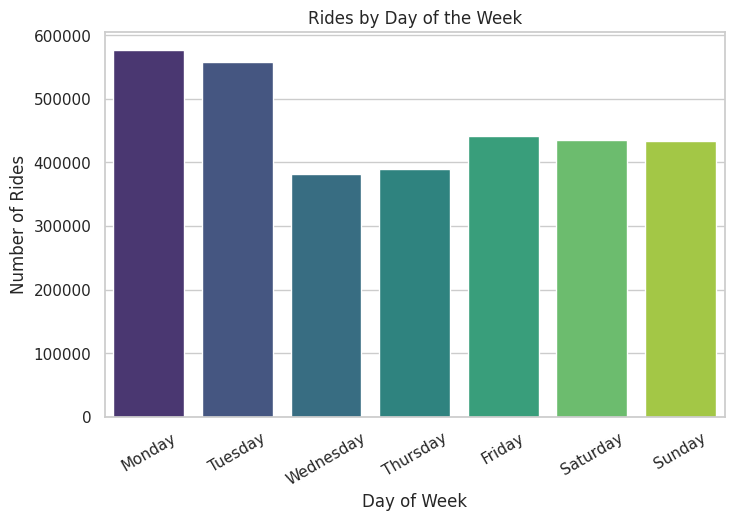

In [11]:
# 2. Busiest Days of the Week
plt.figure(figsize=(8,5))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x="day_of_week", data=df, order=order, palette="viridis")
plt.title("Rides by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=30)
plt.show()

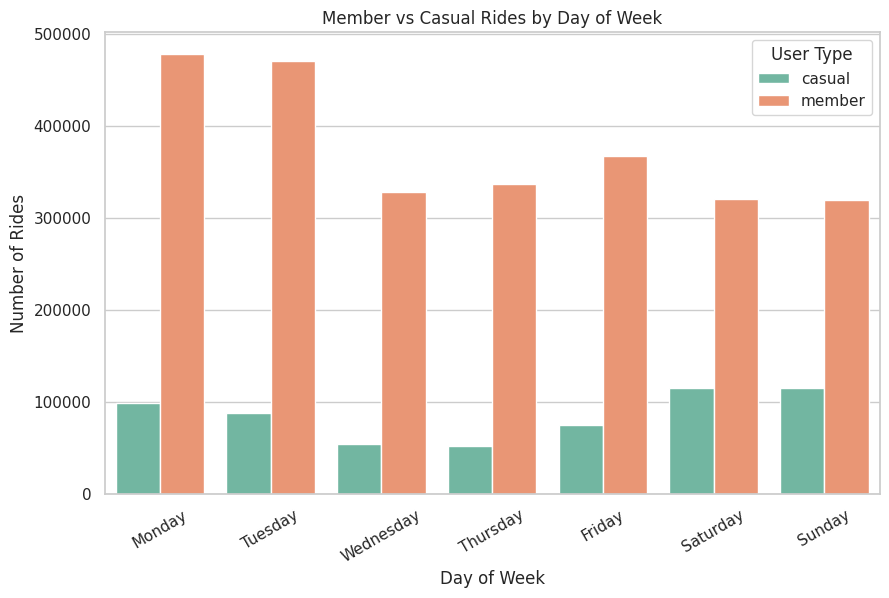

In [12]:
# 3. Member vs Casual by Day of Week
plt.figure(figsize=(10,6))
sns.countplot(x="day_of_week", hue="member_casual", data=df, order=order, palette="Set2")
plt.title("Member vs Casual Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=30)
plt.legend(title="User Type")
plt.show()

/tmp/ipython-input-4273765734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_start.values, y=top_start.index, palette="Blues_r")


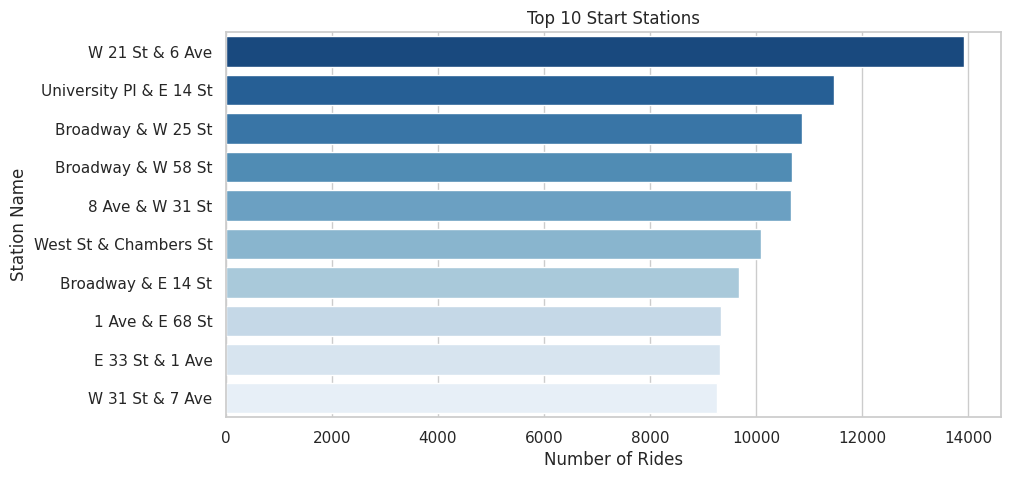

In [13]:
# 1. Top 10 Start Stations
top_start = df["start_station_name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_start.values, y=top_start.index, palette="Blues_r")
plt.title("Top 10 Start Stations")
plt.xlabel("Number of Rides")
plt.ylabel("Station Name")
plt.show()

/tmp/ipython-input-516350437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_end.values, y=top_end.index, palette="Greens_r")


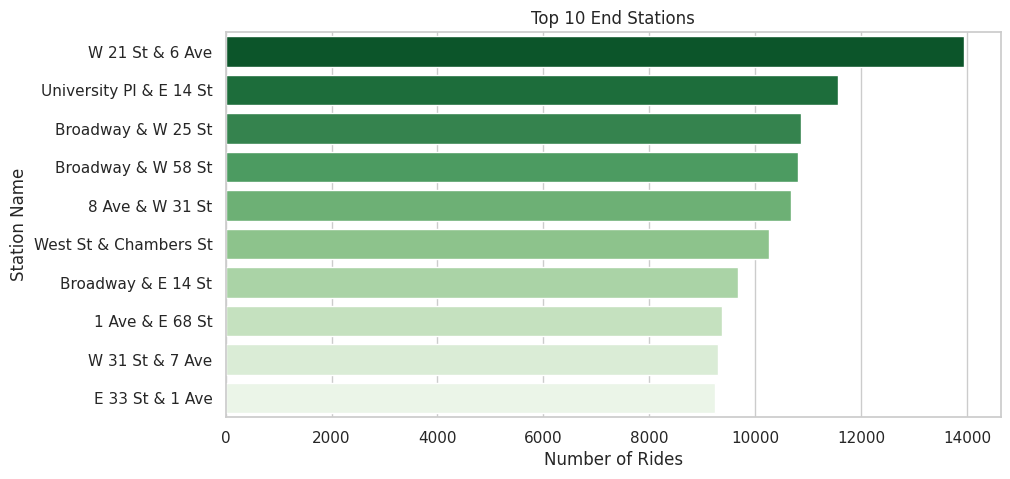

In [14]:
# 2. Top 10 End Stations
top_end = df["end_station_name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_end.values, y=top_end.index, palette="Greens_r")
plt.title("Top 10 End Stations")
plt.xlabel("Number of Rides")
plt.ylabel("Station Name")
plt.show()

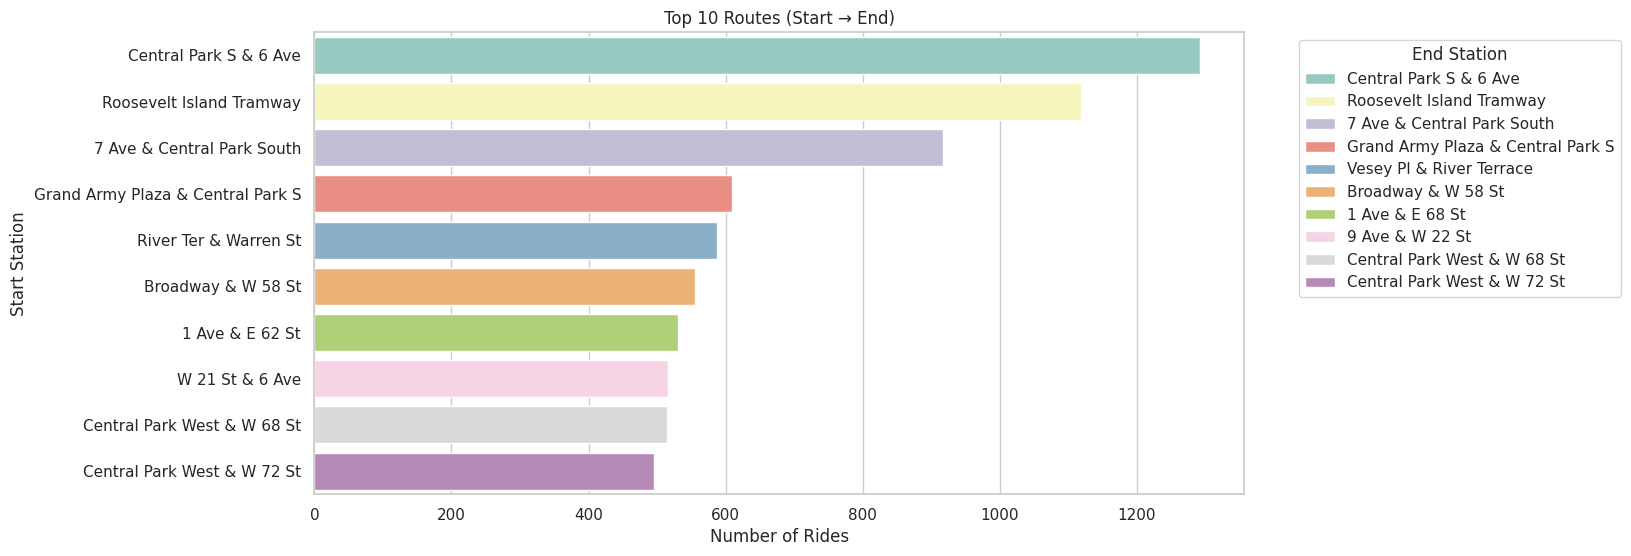

In [15]:
# 3. Top 10 routes (Start → End)
top_routes = (
    df.groupby(["start_station_name", "end_station_name"])
      .size()
      .reset_index(name="count")
      .sort_values("count", ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x="count", y="start_station_name", hue="end_station_name",
            data=top_routes, dodge=False, palette="Set3")
plt.title("Top 10 Routes (Start → End)")
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.legend(title="End Station", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

In [17]:
!ls



202404-citibike-tripdata_1.csv	202404-citibike-tripdata_4.csv
202404-citibike-tripdata_2.csv	202404-citibike-tripdata.zip
202404-citibike-tripdata_3.csv	sample_data


In [18]:
!pip install mrjob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 1.4 MB/s eta 0:00:00


In [19]:
%%writefile popular_stations.py
from mrjob.job import MRJob

class MRMostPopularStations(MRJob):
    def mapper(self, _, line):
        fields = line.split(",")
        if fields[0] != "ride_id":
            start_station = fields[4]
            yield start_station, 1

    def reducer(self, station, counts):
        yield station, sum(counts)

if __name__ == "__main__":
    MRMostPopularStations.run()

Writing popular_stations.py


In [20]:
!python popular_stations.py /content/202404-citibike-tripdata_*.csv | head


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/popular_stations.root.20250902.110941.211765
Running step 1 of 1...
job output is in /tmp/popular_stations.root.20250902.110941.211765/output
Streaming final output from /tmp/popular_stations.root.20250902.110941.211765/output...
"Rockaway Ave & Bainbridge St"	560
"Roebling St & N 4 St"	2521
"Rogers Ave & Lenox Rd"	329
"Rogers Ave & Lincoln Rd"	770
"Rogers Ave & Snyder Ave"	166
"Rogers Ave & Sterling St"	522
"Rogers Pl & E 165 St"	253
"Roosevelt Ave & 104 St"	337
"Roosevelt Island Tramway"	2709
"Rugby Rd & Albemarle Rd"	165
Removing temp directory /tmp/popular_stations.root.20250902.110941.211765...
Traceback (most recent call last):
  File "/content/popular_stations.py", line 14, in <module>
    MRMostPopularStations.run()
  File "/usr/local/lib/python3.12/dist-packages/mrjob/job.py", line 616, in run
    cls().execute()
  File "/usr/local/lib/python3.12/dist-packag

In [21]:
# Run MRJob on all 4 April CitiBike CSVs
# Sort results by trip count (descending) and show top 20 most popular start stations
!python popular_stations.py /content/202404-citibike-tripdata_*.csv | sort -k2 -nr | head -20


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/popular_stations.root.20250902.111029.959340
Running step 1 of 1...
job output is in /tmp/popular_stations.root.20250902.111029.959340/output
Streaming final output from /tmp/popular_stations.root.20250902.111029.959340/output...
Removing temp directory /tmp/popular_stations.root.20250902.111029.959340...
""	2506
"Motorgate"	1953
"W 238 St & Tibbett Ave"	166
"W 233 St & Albany Crescent"	54
"W 230 St & Marble Hill Ave"	222
"W 225 St & Exterior St"	400
"W 218 St & Indian Rd"	177
"W 218 St & Broadway"	218
"W 211 St & 10 Ave"	108
"W 204 St & Vermilyea Ave"	311
"W 204 St & Nagle Ave"	132
"E 201 St & Briggs Ave"	156
"W 192 St & University Ave"	176
"E 191 St & Bathgate Ave"	200
"W 190 St & St Nicholas Ave"	426
"W 190 St & Broadway"	331
"E 189 St & Bathgate Ave"	159
"E 188 St & Hughes Ave"	166
"E 188 St & Creston Ave"	575
"E 187 St & 3 Ave"	224


In [22]:
import subprocess
import pandas as pd

# Run MRJob and capture output
result = subprocess.check_output(
    "python popular_stations.py /content/202404-citibike-tripdata_*.csv",
    shell=True
)

# Decode output (bytes → text) and split into lines
lines = result.decode("utf-8").strip().split("\n")

# Parse into list of tuples (station, count)
data = []
for line in lines:
    if line.strip():  # skip blanks
        station, count = line.rsplit("\t", 1)  # split into name and count
        data.append((station.strip('"'), int(count)))

# Put into DataFrame and sort by count
df_popular = pd.DataFrame(data, columns=["Station", "Trip Count"])
df_popular = df_popular.sort_values("Trip Count", ascending=False).head(20)

# Show top 20 stations
print("===== Top 20 Most Popular Start Stations =====")
display(df_popular)


===== Top 20 Most Popular Start Stations =====


,Station,Trip Count
252,W 21 St & 6 Ave,13913
175,University Pl & E 14 St,11471
1614,Broadway & W 25 St,10865
1624,Broadway & W 58 St,10684
1400,8 Ave & W 31 St,10658
386,West St & Chambers St,10091
1586,Broadway & E 14 St,9683
969,1 Ave & E 68 St,9338
1979,E 33 St & 1 Ave,9322
272,W 31 St & 7 Ave,9271


In [23]:
# 2nd mrjob for finding avg trip duration

In [24]:
%%writefile avg_trip_duration.py
from mrjob.job import MRJob
from datetime import datetime

class MRAverageTripDuration(MRJob):
    def mapper(self, _, line):
        # naive CSV split is OK for CitiBike (no commas inside fields)
        fields = line.split(",")
        if fields[0] != "ride_id":          # skip header
            user_type = fields[12]          # member_casual
            try:
                start = datetime.fromisoformat(fields[2])  # started_at
                end   = datetime.fromisoformat(fields[3])  # ended_at
                dur_min = (end - start).total_seconds() / 60.0
                # keep only reasonable trips
                if 0 < dur_min < 300:
                    yield user_type, (dur_min, 1)
            except Exception:
                pass  # skip bad rows

    def reducer(self, user_type, values):
        total_dur, total_cnt = 0.0, 0
        for d, c in values:
            total_dur += d
            total_cnt += c
        if total_cnt:
            yield user_type, total_dur / total_cnt

if __name__ == "__main__":
    MRAverageTripDuration.run()



Writing avg_trip_duration.py


In [25]:
!python avg_trip_duration.py /content/202404-citibike-tripdata_*.csv


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/avg_trip_duration.root.20250902.111214.838360
Running step 1 of 1...
job output is in /tmp/avg_trip_duration.root.20250902.111214.838360/output
Streaming final output from /tmp/avg_trip_duration.root.20250902.111214.838360/output...
"casual"	20.08387956270953
"member"	11.21228456588188
Removing temp directory /tmp/avg_trip_duration.root.20250902.111214.838360...


In [26]:
import subprocess, pandas as pd

result = subprocess.check_output(
    "python avg_trip_duration.py /content/202404-citibike-tripdata_*.csv",
    shell=True
)

lines = result.decode("utf-8").strip().split("\n")

rows = []
for line in lines:
    if line.strip():
        parts = line.replace('"', '').split("\t")
        if len(parts) == 2:
            user, avg = parts
            rows.append((user.strip(), float(avg.strip())))

df_avg_duration = pd.DataFrame(rows, columns=["User Type", "Avg Trip Duration (min)"])
print("===== Average Trip Duration by User Type =====")
display(df_avg_duration)


===== Average Trip Duration by User Type =====


,User Type,Avg Trip Duration (min)
0,casual,20.083880
1,member,11.212285


In [27]:
# setting up dependencies

In [28]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [29]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!tar xf spark-3.5.6-bin-hadoop3.tgz


In [30]:
# We set the enviromental variables for Java and Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"

In [31]:
!pip install -q pyspark
!pip install -q findspark

In [32]:
 import pyspark

In [33]:
import numpy as np
import pandas as pd
import matplotlib as mpl

In [34]:
!python --version
print('PySpark', pyspark.__version__)
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)

Python 3.12.11
PySpark 3.5.1
NumPy 2.0.2
Pandas 2.2.2
Matplotlib 3.10.0


In [35]:

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("HW4").getOrCreate()
sc = spark.sparkContext

print(sc)
print(sc.version)


<SparkContext master=local[*] appName=HW4>
3.5.6


In [36]:
# 1) Load April CSVs and prep features

In [37]:
# --- Load all 4 April CSVs and compute trip_duration_min ---
import glob
from pyspark.sql.types import *
from pyspark.sql.functions import to_timestamp, unix_timestamp, col

paths = sorted(glob.glob("/content/202404-citibike-tripdata_*.csv"))
print("Found files:", paths)

schema = StructType([
    StructField("ride_id",            StringType(), True),
    StructField("rideable_type",      StringType(), True),
    StructField("started_at",         StringType(), True),
    StructField("ended_at",           StringType(), True),
    StructField("start_station_name", StringType(), True),
    StructField("start_station_id",   StringType(), True),
    StructField("end_station_name",   StringType(), True),
    StructField("end_station_id",     StringType(), True),
    StructField("start_lat",          DoubleType(), True),
    StructField("start_lng",          DoubleType(), True),
    StructField("end_lat",            DoubleType(), True),
    StructField("end_lng",            DoubleType(), True),
    StructField("member_casual",      StringType(), True),
])

df = (spark.read.csv(paths, header=True, schema=schema)
        .withColumn("started_at_ts", to_timestamp("started_at"))
        .withColumn("ended_at_ts",   to_timestamp("ended_at"))
        .withColumn("trip_duration_min",
                    (unix_timestamp("ended_at_ts") - unix_timestamp("started_at_ts")) / 60.0)
        .where((col("trip_duration_min") > 0) & (col("trip_duration_min") < 300))
     ).cache()

print("Rows:", df.count())          # action 1
df.printSchema()
df.show(5, truncate=False)         # action 2


Found files: ['/content/202404-citibike-tripdata_1.csv', '/content/202404-citibike-tripdata_2.csv', '/content/202404-citibike-tripdata_3.csv', '/content/202404-citibike-tripdata_4.csv']
Rows: 3213918
root
 |-- ride_id: string (nullable = true)
 |-- rideable_type: string (nullable = true)
 |-- started_at: string (nullable = true)
 |-- ended_at: string (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_id: string (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_id: string (nullable = true)
 |-- start_lat: double (nullable = true)
 |-- start_lng: double (nullable = true)
 |-- end_lat: double (nullable = true)
 |-- end_lng: double (nullable = true)
 |-- member_casual: string (nullable = true)
 |-- started_at_ts: timestamp (nullable = true)
 |-- ended_at_ts: timestamp (nullable = true)
 |-- trip_duration_min: double (nullable = true)

+----------------+-------------+-----------------------+-----------------------+--------

In [42]:
# 2) Create an RDD
rdd = df.rdd
sc = spark.sparkContext
rdd

MapPartitionsRDD[23] at javaToPython at NativeMethodAccessorImpl.java:0

In [43]:
# 3) MAP → rides per hour (reduceByKey), + actions
from pyspark.sql.functions import hour

hour_rdd = (df.withColumn("hour", hour("started_at_ts"))
              .select("hour")
              .rdd
              .map(lambda r: (int(r["hour"]), 1)))

hour_counts = hour_rdd.reduceByKey(lambda a,b: a+b)

print("Sample hour counts:", hour_counts.take(5))  # ACTION #3
print("Top 10 hours by rides:",
      hour_counts.takeOrdered(10, key=lambda kv: -kv[1]))  # ACTION #4


Sample hour counts: [(15, 228902), (10, 142189), (20, 141225), (5, 22026), (0, 37152)]
Top 10 hours by rides: [(17, 306832), (18, 292401), (16, 248282), (15, 228902), (19, 212846), (14, 211510), (8, 195658), (13, 187489), (12, 176542), (9, 165296)]


In [44]:
long_rides_rdd = rdd.filter(lambda row: row.trip_duration_min is not None and row.trip_duration_min > 60)
print("Example long rides:", long_rides_rdd.take(3))  # ACTION #5


Example long rides: [Row(ride_id='2BABBD5CADF5A240', rideable_type='electric_bike', started_at='2024-04-07 16:45:09.342', ended_at='2024-04-07 17:51:00.198', start_station_name='E 68 St & Madison Ave', start_station_id='6932.15', end_station_name='3 Ave & E 81 St', end_station_id='7154.10', start_lat=40.7691572, start_lng=-73.96703464, end_lat=40.775744, end_lng=-73.9563752, member_casual='member', started_at_ts=datetime.datetime(2024, 4, 7, 16, 45, 9, 342000), ended_at_ts=datetime.datetime(2024, 4, 7, 17, 51, 0, 198000), trip_duration_min=65.85), Row(ride_id='578FBF0487F1C072', rideable_type='electric_bike', started_at='2024-04-06 19:20:57.437', ended_at='2024-04-06 20:36:56.469', start_station_name='E 16 St & 5 Ave', start_station_id='6022.04', end_station_name='Macon St & Patchen Ave', end_station_id='4301.04', start_lat=40.73726186, start_lng=-73.99238967, end_lat=40.68374, end_lng=-73.9261, member_casual='member', started_at_ts=datetime.datetime(2024, 4, 6, 19, 20, 57, 437000), en

In [45]:
# 5) JOIN → starts-per-station ⨝ ends-per-station, + action
# counts of starts and ends per station_id
starts = rdd.map(lambda r: (r.start_station_id, 1)).reduceByKey(lambda a,b: a+b)
ends   = rdd.map(lambda r: (r.end_station_id,   1)).reduceByKey(lambda a,b: a+b)

traffic = starts.join(ends)  # (station_id, (starts_count, ends_count))
print("Traffic join sample:", traffic.take(5))  # ACTION #6

# attach a readable station name (pick any name seen for that id)
names = rdd.map(lambda r: (r.start_station_id, r.start_station_name)).reduceByKey(lambda a,b: a if a else b)

traffic_named = names.join(traffic).map(
    lambda kv: (kv[0], kv[1][0], kv[1][1][0], kv[1][1][1])  # (station_id, name, starts, ends)
)

top_by_starts = traffic_named.takeOrdered(10, key=lambda x: -x[2])  # starts desc
print("Top 10 stations by starts (id, name, starts, ends):")
for t in top_by_starts:
    print(t)


Traffic join sample: [('6072.16', (3522, 3562)), ('7450.05', (1926, 1937)), ('3379.03', (340, 346)), ('6551.02', (4306, 4346)), ('6960.10', (1851, 2250))]
Top 10 stations by starts (id, name, starts, ends):
('6140.05', 'W 21 St & 6 Ave', 13904, 13936)
('5905.14', 'University Pl & E 14 St', 11468, 11558)
('6173.08', 'Broadway & W 25 St', 10857, 10863)
('6450.05', '8 Ave & W 31 St', 10652, 10666)
('5329.03', 'West St & Chambers St', 10082, 10255)
('5905.12', 'Broadway & E 14 St', 9677, 9679)
('6822.09', '1 Ave & E 68 St', 9333, 9366)
('6197.08', 'E 33 St & 1 Ave', 9319, 9247)
('6331.01', 'W 31 St & 7 Ave', 9265, 9302)
('6726.01', '11 Ave & W 41 St', 9068, 9087)
